Things i have to do:

Objectives:

1. Soccer match winner prediction using Deep Learning.

2. Building a soccer team using deep learning.

And to build a frontend for it.

Have to complete before 14th Feb 2022.

For building UI for the deep learning models, I will proceed with
Gradio frameworks for building the UI.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Soccer match winner prediction using deep learning



References:


https://www.researchgate.net/publication/349272309_Soccer_Result_Prediction_Using_Deep_Learning_and_Neural_Networks

Dataset sources:

http://football-data.co.uk/data.php


Main Data Source:

http://football-data.co.uk/francem.php


Building a deep learning that can detect a home team will win or the away team will win.

France ligue le championnat data for the following sessions:

2021/2022

2020/2021

2019/2020

For information regarding features, please go to 
the link:
http://football-data.co.uk/notes.txt

## Loading the data

In [ ]:
# Session 2021/2022
s1 = pd.read_csv("lechampionnat2122.csv")
s1.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,06/08/2021,20:00,Monaco,Nantes,1,1,D,1,1,D,15,5,3,1,6,14,5,2,0,0,0,0,1.44,4.33,7.0,1.45,4.6,7.0,1.50,4.50,6.0,1.51,4.62,6.82,1.50,4.20,6.0,1.45,4.4,...,4.75,7.5,1.40,4.75,8.00,1.45,4.60,7.0,1.44,4.83,8.07,1.42,4.33,7.5,1.40,4.6,8.0,1.53,5.00,8.84,1.42,4.64,7.66,1.80,2.00,1.86,2.05,1.87,2.15,1.81,2.02,-1.25,2.02,1.91,2.02,1.91,2.03,1.99,1.97,1.89
1,F1,07/08/2021,16:00,Lyon,Brest,1,1,D,0,1,A,17,13,4,8,10,12,9,4,1,1,0,0,1.33,5.00,8.5,1.36,5.5,7.5,1.35,5.75,7.5,1.35,5.95,8.71,1.32,5.25,8.0,1.30,5.5,...,5.00,8.5,1.34,5.50,8.25,1.40,5.25,7.5,1.37,5.55,8.59,1.33,5.00,8.5,1.33,5.5,9.0,1.42,5.75,9.00,1.36,5.40,8.04,1.44,2.75,1.49,2.77,1.49,2.95,1.45,2.76,-1.50,2.00,1.93,2.00,1.93,2.00,1.94,1.96,1.89


In [ ]:
# Session 2020/2021
s2 = pd.read_csv("lechampionnat2021.csv")
s2.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,21/08/2020,18:00,Bordeaux,Nantes,0,0,D,0,0,D,5,6,1,1,10,15,2,3,2,3,1,0,2.4,3.0,3.25,2.40,3.0,3.3,2.50,2.8,3.25,2.48,3.03,3.33,2.45,3.0,3.10,2.45,2.88,...,2.87,3.10,2.75,2.9,2.95,2.7,2.80,3.00,2.71,2.97,3.02,2.62,3.0,2.90,2.63,2.88,3.00,2.80,3.08,3.25,2.65,2.93,3.01,2.75,1.44,2.89,1.46,2.90,1.49,2.79,1.43,0.00,1.86,2.04,1.85,2.07,1.90,2.24,1.82,2.05
1,F1,22/08/2020,16:00,Dijon,Angers,0,1,A,0,1,A,9,12,1,4,15,8,3,9,0,0,0,0,2.7,3.1,2.80,2.75,3.0,2.8,2.75,2.9,2.80,2.79,3.09,2.84,2.70,3.1,2.75,2.70,3.00,...,3.10,2.35,3.10,3.1,2.45,3.3,2.85,2.45,3.36,3.07,2.44,3.25,3.0,2.38,3.40,2.90,2.38,3.46,3.17,2.53,3.30,3.02,2.39,2.75,1.44,2.72,1.50,2.86,1.56,2.61,1.49,0.25,1.86,2.07,1.85,2.06,1.88,2.08,1.83,2.03


In [ ]:
# Session 2019/2020
s3 = pd.read_csv("lechampionnat1920.csv")
s3.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,09/08/2019,19:45,Monaco,Lyon,0,3,A,0,2,A,7,13,1,3,10,17,2,5,2,2,1,0,3.00,3.3,2.37,2.85,3.3,2.40,2.90,3.35,2.45,2.95,3.57,2.43,2.80,3.5,2.4,2.90,3.4,...,3.4,2.05,3.30,3.5,2.15,3.40,3.55,2.1,3.37,3.65,2.19,3.2,3.4,2.20,3.50,3.6,2.1,3.5,3.66,2.36,3.33,3.51,2.15,1.8,2.00,1.83,2.07,1.90,2.15,1.81,2.01,0.25,2.04,1.86,2.01,1.90,2.06,2.01,2.01,1.87
1,F1,10/08/2019,16:30,Marseille,Reims,0,2,A,0,0,D,10,8,2,5,18,8,5,3,1,0,0,0,1.66,3.5,6.00,1.62,3.6,5.75,1.65,3.75,5.60,1.65,3.82,6.06,1.63,3.6,5.8,1.65,3.8,...,3.4,6.00,1.67,3.6,5.75,1.73,3.60,5.1,1.78,3.39,5.70,1.7,3.5,5.25,1.73,3.6,5.5,1.8,3.70,6.15,1.73,3.49,5.45,2.1,1.72,2.16,1.76,2.24,1.81,2.08,1.75,-0.75,2.02,1.88,2.05,1.87,2.06,1.97,1.98,1.89


In [ ]:
print(s1.shape)
print(s2.shape)
print(s3.shape)

(230, 105)
(380, 105)
(279, 105)


## Basic Exploratory Data Analysis (EDA)

In [ ]:
# Checking for missing values
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64


In [ ]:
# Concatenating the data from three sessions for further analysis
smpdata = pd.concat([s1,s2,s3],axis = 0)
smpdata.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,06/08/2021,20:00,Monaco,Nantes,1,1,D,1,1,D,15,5,3,1,6,14,5,2,0,0,0,0,1.44,4.33,7.0,1.45,4.6,7.0,1.50,4.50,6.0,1.51,4.62,6.82,1.50,4.20,6.0,1.45,4.4,...,4.75,7.5,1.40,4.75,8.00,1.45,4.60,7.0,1.44,4.83,8.07,1.42,4.33,7.5,1.40,4.6,8.0,1.53,5.00,8.84,1.42,4.64,7.66,1.80,2.00,1.86,2.05,1.87,2.15,1.81,2.02,-1.25,2.02,1.91,2.02,1.91,2.03,1.99,1.97,1.89
1,F1,07/08/2021,16:00,Lyon,Brest,1,1,D,0,1,A,17,13,4,8,10,12,9,4,1,1,0,0,1.33,5.00,8.5,1.36,5.5,7.5,1.35,5.75,7.5,1.35,5.95,8.71,1.32,5.25,8.0,1.30,5.5,...,5.00,8.5,1.34,5.50,8.25,1.40,5.25,7.5,1.37,5.55,8.59,1.33,5.00,8.5,1.33,5.5,9.0,1.42,5.75,9.00,1.36,5.40,8.04,1.44,2.75,1.49,2.77,1.49,2.95,1.45,2.76,-1.50,2.00,1.93,2.00,1.93,2.00,1.94,1.96,1.89


In [ ]:
smpdata.shape

(889, 105)

In [ ]:
# Checking for missing values
smpdata.isnull().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 105, dtype: int64

In [ ]:
# Replacing NaN values with 0 if any
smpdata = smpdata.fillna(0)

In [ ]:
# Dropping redundant columns for further analysis
smpdata = smpdata.drop(['Div','Date','Time','FTAG','FTHG','MaxCH','AvgCH','BWCA','AvgCA','MaxCA'],axis = 1)
smpdata.head(2)

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,...,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCD,AvgCD,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,Monaco,Nantes,D,1,1,D,15,5,3,1,6,14,5,2,0,0,0,0,1.44,4.33,7.0,1.45,4.6,7.0,1.50,4.50,6.0,1.51,4.62,6.82,1.50,4.20,6.0,1.45,4.4,6.5,1.54,4.71,7.00,1.49,...,1.85,2.14,1.81,2.06,1.40,4.75,7.5,1.40,4.75,1.45,4.60,7.0,1.44,4.83,8.07,1.42,4.33,7.5,1.40,4.6,8.0,5.00,4.64,1.80,2.00,1.86,2.05,1.87,2.15,1.81,2.02,-1.25,2.02,1.91,2.02,1.91,2.03,1.99,1.97,1.89
1,Lyon,Brest,D,0,1,A,17,13,4,8,10,12,9,4,1,1,0,0,1.33,5.00,8.5,1.36,5.5,7.5,1.35,5.75,7.5,1.35,5.95,8.71,1.32,5.25,8.0,1.30,5.5,8.5,1.37,6.40,9.39,1.34,...,1.95,2.08,1.90,1.95,1.36,5.00,8.5,1.34,5.50,1.40,5.25,7.5,1.37,5.55,8.59,1.33,5.00,8.5,1.33,5.5,9.0,5.75,5.40,1.44,2.75,1.49,2.77,1.49,2.95,1.45,2.76,-1.50,2.00,1.93,2.00,1.93,2.00,1.94,1.96,1.89


In [ ]:
# Checking the datatypes of each attribute
smpdata.dtypes

HomeTeam     object
AwayTeam     object
FTR          object
HTHG          int64
HTAG          int64
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 95, dtype: object

### Analysis of categorical variables

In [ ]:
smpdatac = smpdata.select_dtypes(include= 'object')
smpdatac.head(1)

,HomeTeam,AwayTeam,FTR,HTR
0,Monaco,Nantes,D,D


In [ ]:
# Information about various categorical variables
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
# HomeTeam = Home Team
# AwayTeam = Away Team

In [ ]:
# Descriptive Analysis of categorical variables
smpdatac.describe(include = 'all')

,HomeTeam,AwayTeam,FTR,HTR
count,889,889,889,889
unique,24,24,3,3
top,Nice,Nantes,H,D
freq,46,45,374,337


In [ ]:
# FTR is the target variable
smpdatac['FTR'].value_counts()

H    374
A    286
D    229
Name: FTR, dtype: int64

In [ ]:
print(smpdatac['HTR'].value_counts())
print()
print(smpdatac['HomeTeam'].value_counts())
print()
print(smpdatac['AwayTeam'].value_counts())

D    337
H    302
A    250
Name: HTR, dtype: int64

Nice           46
Monaco         45
Marseille      45
Rennes         45
St Etienne     45
Montpellier    45
Angers         45
Lille          45
Lyon           44
Reims          44
Nantes         44
Brest          44
Paris SG       44
Metz           44
Strasbourg     44
Bordeaux       44
Dijon          33
Nimes          33
Lorient        30
Lens           30
Amiens         14
Toulouse       13
Troyes         12
Clermont       11
Name: HomeTeam, dtype: int64

Nantes         45
Bordeaux       45
Reims          45
Metz           45
Lyon           45
Brest          45
Monaco         44
St Etienne     44
Montpellier    44
Rennes         44
Strasbourg     44
Marseille      44
Lille          44
Angers         44
Paris SG       44
Nice           43
Dijon          33
Nimes          33
Lorient        31
Lens           31
Toulouse       15
Amiens         14
Clermont       12
Troyes         11
Name: AwayTeam, dtype: int64


### Analysis of numerical variables


In [ ]:
smpdatan = smpdata.select_dtypes(include = np.number)
smpdatan.head(1)

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,...,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCD,AvgCD,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,1,1,15,5,3,1,6,14,5,2,0,0,0,0,1.44,4.33,7.0,1.45,4.6,7.0,1.5,4.5,6.0,1.51,4.62,6.82,1.5,4.2,6.0,1.45,4.4,6.5,1.54,4.71,7.0,1.49,4.49,6.46,1.66,2.2,...,1.85,2.14,1.81,2.06,1.4,4.75,7.5,1.4,4.75,1.45,4.6,7.0,1.44,4.83,8.07,1.42,4.33,7.5,1.4,4.6,8.0,5.0,4.64,1.8,2.0,1.86,2.05,1.87,2.15,1.81,2.02,-1.25,2.02,1.91,2.02,1.91,2.03,1.99,1.97,1.89


In [ ]:
smpdatan.shape

(889, 91)

In [ ]:
smpdatan.describe()

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,...,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCD,AvgCD,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.677165,0.559055,13.057368,10.742407,4.499438,3.767154,12.532058,12.503937,5.320585,4.347582,1.844769,2.017998,0.120360,0.140607,2.718076,3.833836,4.138459,2.689381,3.831586,4.092475,2.713026,3.793701,4.055039,2.767829,3.950922,4.297255,2.714263,3.748639,4.184308,2.738290,3.768526,4.245883,2.893622,4.093262,4.566490,2.714421,3.842463,4.116389,1.977885,1.926434,...,1.995028,1.985962,1.934139,1.925242,2.728808,3.847053,4.180394,2.737120,3.839010,2.745804,3.758324,4.080292,2.820427,3.944646,4.400349,2.762002,3.762587,4.282565,2.780079,3.833262,4.328976,4.110585,3.835388,1.987863,1.950529,2.040945,1.993003,2.089269,2.080349,1.983217,1.952238,-0.257312,1.952306,1.958661,1.960124,1.965456,2.010394,2.014983,1.929190,1.932497
std,0.820861,0.725306,4.903813,4.351661,2.455516,2.173966,3.657236,3.725708,2.830344,2.556919,1.235993,1.314212,0.364719,0.372815,1.779887,1.169465,3.096739,1.668158,1.157841,3.083647,1.671144,1.119579,3.010803,1.736926,1.227063,3.401238,1.826648,1.123440,3.529239,1.887513,1.209933,3.691724,2.011898,1.384642,4.220845,1.702300,1.147684,3.169649,0.347791,0.459379,...,0.094480,0.094959,0.090397,0.089773,1.786129,1.141766,3.222730,1.718947,1.185175,1.692066,1.067388,2.876655,1.814267,1.343387,3.622433,1.885551,1.163314,3.590534,1.924205,1.265242,3.931748,1.448676,1.209490,0.344635,0.480785,0.362939,0.486658,0.368215,0.536257,0.336815,0.465676,0.766763,0.099838,0.099860,0.101178,0.102031,0.099957,0.107680,0.093661,0.094115
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050000,2.100000,1.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.070000,2.200000,1.190000,1.050000,2.090000,1.160000,0.000000,0.000000,...,1.790000,1.790000,1.720000,1.740000,0.000000,0.000000,0.000000,1.050000,2.200000,1.070000,2.200000,1.170000,1.050000,2.300000,1.160000,1.030000,2.200000,1.140000,1.040000,2.200000,1.140000,2.370000,2.190000,1.160000,1.360000,1.170000,1.370000,1.200000,1.420000,1.160000,1.370000,-3.250000,1.650000,1.670000,1.660000,1.720000,1.800000,1.790000,1.680000,1.710000
25%,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.750000,3.250000,2.450000,1.800000,3.300000,2.450000,1.800000,3.200000,2.500000,1.810000,3.330000,2.560000,1.780000,3.200000,2.450000,1.750000,3.200000,2.500000,1.860000,3.430000,2.610000,1.790000,3.260000,2.480000,1.800000,1.660000,...,1.920000,1.900000,1.860000,1.850000,1.750000,3.250000,2.400000,1.780000,3.250000,1.800000,3.150000,2.

### Checking VIF (Variance Inflation Factor) for numerical variables

In [ ]:
# VIF more than 10 means multicollinearity is present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(smpdatan.values, i) for i in range(smpdatan.shape[1])]
vif["features"] = smpdatan.columns
print(len(vif[vif['VIF']>10]))

82


In [ ]:
# So we can mutlicollinearity is present.

##EDA

In [ ]:
# Encoding the categorical variables
smpdatac.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'HTR'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
smpdata['HomeTeam'] = le1.fit_transform(smpdata['HomeTeam'])
le2 = LabelEncoder()
smpdata['AwayTeam'] = le2.fit_transform(smpdata['AwayTeam'])
le3 = LabelEncoder()
smpdata['FTR'] = le3.fit_transform(smpdata['FTR'])
le4 = LabelEncoder()
smpdata['HTR'] = le4.fit_transform(smpdata['HTR'])

In [ ]:
# Saving the label encoders as .pkl file
import pickle

# Label Encoder 1
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le1.pickle', 'wb') as handle:
    pickle.dump(le1, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le1.pickle', 'rb') as handle:
    le1 = pickle.load(handle)

# Label Encoder 2
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le2.pickle', 'wb') as handle:
    pickle.dump(le2, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le2.pickle', 'rb') as handle:
    le2 = pickle.load(handle)

# Label Encoder 3
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le3.pickle', 'wb') as handle:
    pickle.dump(le3, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le3.pickle', 'rb') as handle:
    le3 = pickle.load(handle)

# Label Encoder 4
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le4.pickle', 'wb') as handle:
    pickle.dump(le4, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le4.pickle', 'rb') as handle:
    le4 = pickle.load(handle)

In [ ]:
le1_name_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print(le1_name_mapping)

{'Amiens': 0, 'Angers': 1, 'Bordeaux': 2, 'Brest': 3, 'Clermont': 4, 'Dijon': 5, 'Lens': 6, 'Lille': 7, 'Lorient': 8, 'Lyon': 9, 'Marseille': 10, 'Metz': 11, 'Monaco': 12, 'Montpellier': 13, 'Nantes': 14, 'Nice': 15, 'Nimes': 16, 'Paris SG': 17, 'Reims': 18, 'Rennes': 19, 'St Etienne': 20, 'Strasbourg': 21, 'Toulouse': 22, 'Troyes': 23}


In [ ]:
le2_name_mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print(le2_name_mapping)

{'Amiens': 0, 'Angers': 1, 'Bordeaux': 2, 'Brest': 3, 'Clermont': 4, 'Dijon': 5, 'Lens': 6, 'Lille': 7, 'Lorient': 8, 'Lyon': 9, 'Marseille': 10, 'Metz': 11, 'Monaco': 12, 'Montpellier': 13, 'Nantes': 14, 'Nice': 15, 'Nimes': 16, 'Paris SG': 17, 'Reims': 18, 'Rennes': 19, 'St Etienne': 20, 'Strasbourg': 21, 'Toulouse': 22, 'Troyes': 23}


In [ ]:
# Target variable encoded classes
le3_name_mapping = dict(zip(le3.classes_, le3.transform(le3.classes_)))
print(le3_name_mapping)

{'A': 0, 'D': 1, 'H': 2}


In [ ]:
le4_name_mapping = dict(zip(le4.classes_, le4.transform(le4.classes_)))
print(le4_name_mapping)

{'A': 0, 'D': 1, 'H': 2}


## Splitting Training set and Test set

In [ ]:
y = smpdata['FTR']
X = smpdata.drop(['FTR'] ,axis=1)

In [ ]:
# Splitting training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 94)
(178, 94)
(711,)
(178,)


## Feature Selection using Random Forest

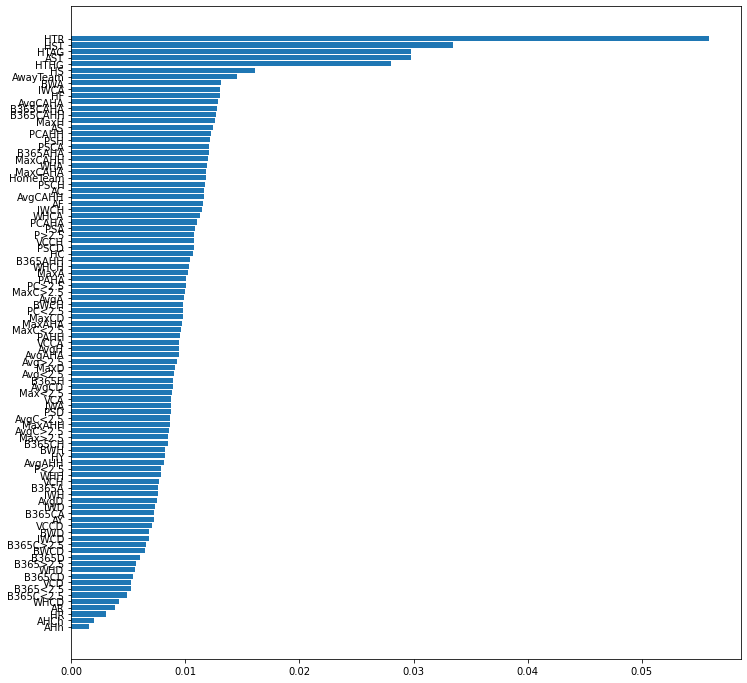

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier()
rfs.fit(x_train, y_train)
features = x_train.columns
f_is = list(zip(features,rfs.feature_importances_))
f_is.sort(key = lambda x : x[1])
plt.figure(figsize = (12,12))
plt.barh([x[0] for x in f_is],[x[1] for x in f_is])
plt.show()

In [ ]:
f_is

[('AHh', 0.001543216514676506),
 ('AHCh', 0.002006987491236653),
 ('HR', 0.0030310263778025996),
 ('AR', 0.00386158260698931),
 ('WHCD', 0.004193152081045635),
 ('B365C<2.5', 0.004913196321341969),
 ('B365<2.5', 0.005226205593076688),
 ('VCD', 0.005245609182674153),
 ('B365CD', 0.005439200538730124),
 ('WHD', 0.005616267252037228),
 ('B365>2.5', 0.005705547251222831),
 ('B365D', 0.006061953491790388),
 ('BWCD', 0.006470894991883961),
 ('B365C>2.5', 0.006584816030677373),
 ('IWCD', 0.00678269449864856),
 ('BWD', 0.006803260876421252),
 ('VCCD', 0.007051853294681867),
 ('AY', 0.007282940197113621),
 ('B365CA', 0.007289710027516792),
 ('IWD', 0.007331088709835328),
 ('AvgD', 0.007497157489715255),
 ('IWH', 0.007567164480180516),
 ('B365A', 0.007596737490987566),
 ('VCH', 0.007682618191512631),
 ('WHH', 0.007894299672643417),
 ('P<2.5', 0.007898614426875393),
 ('AvgAHH', 0.008140049822106409),
 ('HY', 0.008246868240387832),
 ('BWH', 0.00825618519572561),
 ('B365CH', 0.008449250412080018),


In [ ]:
print(len(f_is))
f_i30s = f_is[73:]
f_i30s = dict(f_i30s)
print()
print(f_i30s)
print()
print(len(f_i30s))

94

{'WHA': 0.011927818081776578, 'MaxCAHH': 0.011964924937490098, 'B365AHA': 0.012039545007328163, 'PSCA': 0.012075658852166365, 'PSH': 0.012133598427860923, 'PCAHH': 0.012241509891358188, 'AS': 0.012397875983745634, 'MaxH': 0.012563505317724804, 'B365CAHH': 0.012650039968105592, 'B365CAHA': 0.012741193286244519, 'AvgCAHA': 0.012869057883899464, 'HF': 0.013007465194846714, 'IWCA': 0.013029931829409303, 'BWA': 0.013164981680334755, 'AwayTeam': 0.014562149017269776, 'HS': 0.01614345883587278, 'HTHG': 0.028024075089533643, 'AST': 0.02979133557088546, 'HTAG': 0.029812251721820858, 'HST': 0.033424995645024644, 'HTR': 0.05587123888798844}

21


In [ ]:
# Top features
f_i30fss = f_i30s.keys()
f_i30fss = list(f_i30fss)
print(f_i30fss)

['WHA', 'MaxCAHH', 'B365AHA', 'PSCA', 'PSH', 'PCAHH', 'AS', 'MaxH', 'B365CAHH', 'B365CAHA', 'AvgCAHA', 'HF', 'IWCA', 'BWA', 'AwayTeam', 'HS', 'HTHG', 'AST', 'HTAG', 'HST', 'HTR']


In [ ]:
# Removing unwanted columns
rem = ['PSCH','IWCA','PCAHH','MaxCAHA', 'PAHA','MaxCAHH','PSH']
best_features1 = [i for i in f_i30fss if i not in rem]
print(len(best_features1))
print()
print(best_features1)

17

['WHA', 'B365AHA', 'PSCA', 'AS', 'MaxH', 'B365CAHH', 'B365CAHA', 'AvgCAHA', 'HF', 'BWA', 'AwayTeam', 'HS', 'HTHG', 'AST', 'HTAG', 'HST', 'HTR']


In [ ]:
# For Deep Neural Networks we need to scale the data.
best_features = ['HomeTeam', 'HF', 'AF', 'HS', 'HC', 'AwayTeam',      
        'AvgA', 'AS', 'AvgH', 'AST', 'HTAG', 'HST', 
        'HTHG', 'HTR']
X = X[best_features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled , columns = X.columns)

# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/scaler1.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/scaler1.pickle', 'rb') as handle:
    scaler = pickle.load(handle)

X.head(1)

,HomeTeam,HF,AF,HS,HC,AwayTeam,AvgA,AS,AvgH,AST,HTAG,HST,HTHG,HTR
0,12,6,14,15,5,14,6.46,5,1.49,1,1,3,1,1


In [ ]:
x_trainfs, x_testfs, y_trainfs, y_testfs = train_test_split(X_scaled, y,random_state=0, test_size = 0.2)
print(x_trainfs.shape)
print(x_testfs.shape)
print(y_trainfs.shape)
print(y_testfs.shape)

(711, 14)
(178, 14)
(711,)
(178,)


In [ ]:
x_trainfs.columns

Index(['HomeTeam', 'HF', 'AF', 'HS', 'HC', 'AwayTeam', 'AvgA', 'AS', 'AvgH',
       'AST', 'HTAG', 'HST', 'HTHG', 'HTR'],
      dtype='object')

## Model Building and Training

In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(90, activation = 'relu', input_shape = (None,14), name= 'Hidden_layer1'))
  model.add(tf.keras.layers.Dense(56, activation = 'relu', name = 'Hidden_layer2'))
  model.add(tf.keras.layers.Dropout(0.2, name = 'Dropout'))
  model.add(tf.keras.layers.Dense(3, activation = 'softmax', name = 'Output_layer'))
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = 'accuracy')
  return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 90)          1350      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 56)          5096      
                                                                 
 Dropout (Dropout)           (None, None, 56)          0         
                                                                 
 Output_layer (Dense)        (None, None, 3)           171       
                                                                 
Total params: 6,617
Trainable params: 6,617
Non-trainable params: 0
_________________________________________________________________


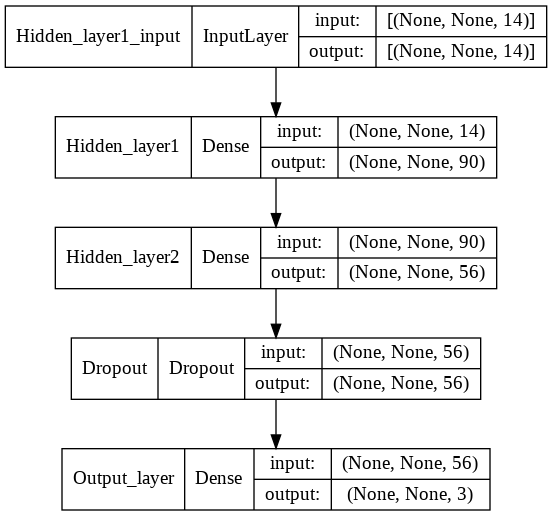

In [ ]:
# Plotting model architecture
tf.keras.utils.plot_model(model, to_file= '/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smpmodel.png', show_shapes=True)

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smp1.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

In [ ]:
int_epoch = 20
callbacks = [ checkpointer]
history = model.fit(x_trainfs,y_train,
                    epochs = int_epoch,
                    validation_data = (x_testfs, y_test),
                    callbacks = callbacks)

Epoch 1/20
 1/23 [>.............................] - ETA: 8s - loss: 1.1559 - accuracy: 0.3438WARNING:tensorflow:Model was constructed with shape (None, None, 14) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 14), dtype=tf.float32, name='Hidden_layer1_input'), name='Hidden_layer1_input', description="created by layer 'Hidden_layer1_input'"), but it was called on an input with incompatible shape (None, 14).

Epoch 00001: val_accuracy improved from -inf to 0.60674, saving model to /content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smp1.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.0365 - accuracy: 0.4754 - val_loss: 0.9054 - val_accuracy: 0.6067
Epoch 2/20
20/23 [=========================>....] - ETA: 0s - loss: 0.8579 - accuracy: 0.6328
Epoch 00002: val_accuracy improved from 0.60674 to 0.63483, saving model to /content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smp1.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 0.8513 - accuracy: 0.6343 - val

In [ ]:
print(f"Loss: {history.history['loss'][-1]}")  
print(f"accuracy: {history.history['accuracy'][-1]}")   
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

Loss: 0.5855916738510132
accuracy: 0.7285513281822205
Validation accuracy: 0.6460674405097961


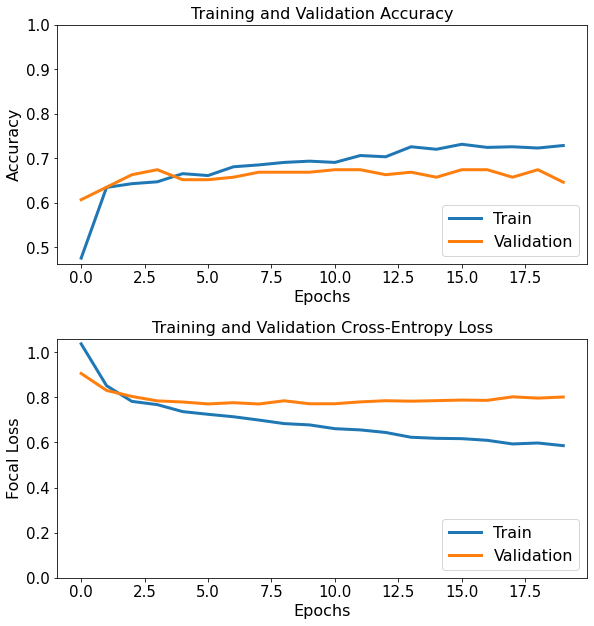

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 


plt.figure(figsize=(9, 9)) 
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3.0)
plt.plot(acc, label='Train' , linewidth = 3)
plt.plot(val_acc, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/acc_plot1.jpg')

plt.subplot(2, 1, 2)
plt.tight_layout(pad=3.0)
plt.plot(loss, label='Train', linewidth = 3)
plt.plot(val_loss, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Focal Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-Entropy Loss', fontsize=16)
plt.show()
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/loss_plot1.jpg')

In [ ]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

new_model = load_trained_model('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smp1.hdf5')
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 90)          1350      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 56)          5096      
                                                                 
 Dropout (Dropout)           (None, None, 56)          0         
                                                                 
 Output_layer (Dense)        (None, None, 3)           171       
                                                                 
Total params: 6,617
Trainable params: 6,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = new_model.predict(x_testfs)
y_predargmax = tf.math.argmax(y_pred, axis = 1)
from sklearn.metrics import classification_report
cr = classification_report(y_testfs, y_predargmax, digits = 4)
print(cr)

              precision    recall  f1-score   support

           0     0.6000    0.8000    0.6857        45
           1     0.5714    0.2400    0.3380        50
           2     0.7423    0.8675    0.8000        83

    accuracy                         0.6742       178
   macro avg     0.6379    0.6358    0.6079       178
weighted avg     0.6583    0.6742    0.6413       178



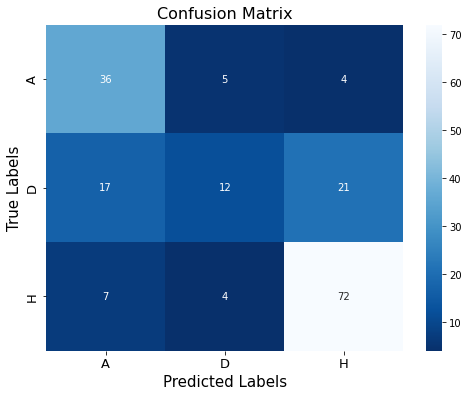

<Figure size 432x288 with 0 Axes>

In [ ]:
# {'A': 0, 'D': 1, 'H': 2}
classes = ["A", "D", "H"]
plt.figure(figsize = (8,6))
from sklearn.metrics import confusion_matrix
cmb = confusion_matrix(y_test, y_predargmax)
ax = sns.heatmap(cmb,annot =True , fmt='g',cmap='Blues_r') 
plt.title('Confusion Matrix',fontsize = 16)
plt.ylabel('True Labels',fontsize = 15)
plt.xlabel('Predicted Labels', fontsize = 15)
plt.yticks(verticalalignment = 'center')
plt.xticks(fontsize = 13); plt.yticks(fontsize = 13)
ax.xaxis.set_ticklabels(classes,fontsize = 13); ax.yaxis.set_ticklabels(classes,fontsize = 13)
plt.show()
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/cm1.jpg')

## Prediction function for soccer match winner prediction using deep learning

In [ ]:
"""
HomeTeam(le1): {'Amiens': 0, 'Angers': 1, 'Bordeaux': 2, 'Brest': 3, 'Clermont': 4, 'Dijon': 5, 'Lens': 6, 'Lille': 7, 'Lorient': 8, 
      'Lyon': 9, 'Marseille': 10, 'Metz': 11, 'Monaco': 12, 'Montpellier': 13, 'Nantes': 14, 
         'Nice': 15, 'Nimes': 16, 'Paris SG': 17, 'Reims': 18, 'Rennes': 19, 'St Etienne': 20, 
      'Strasbourg': 21, 'Toulouse': 22, 'Troyes': 23}
AwayTeam(le2): {'Amiens': 0, 'Angers': 1, 'Bordeaux': 2, 'Brest': 3, 'Clermont': 4, 'Dijon': 5, 
            'Lens': 6, 'Lille': 7, 'Lorient': 8, 'Lyon': 9, 'Marseille': 10, 'Metz': 11, 'Monaco': 12, 
            'Montpellier': 13, 'Nantes': 14, 'Nice': 15, 'Nimes': 16, 'Paris SG': 17, 'Reims': 18, 
            'Rennes': 19, 'St Etienne': 20, 'Strasbourg': 21, 'Toulouse': 22, 'Troyes': 23}
FTR-Full Time Result (le3): {'A': 0, 'D': 1, 'H': 2}
HTR-Half Time Result (le4): {'A': 0, 'D': 1, 'H': 2}
"""
""" 
Information about the features:
HomeTeam
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HS = Home Team Shots
HC = Home Team Corners
AwayTeam
AvgA = Market average away win odds
AS = Away Team Shots
AvgH = Market average home win odds
AST = Away Team Shots on Target
HTAG = Half Time Away Team Goals
HST = Home Team Shots on Target
HTHG = Half Time Home Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
"""

' \nInformation about the features:\nHomeTeam\nHF = Home Team Fouls Committed\nAF = Away Team Fouls Committed\nHS = Home Team Shots\nHC = Home Team Corners\nAwayTeam\nAvgA = Market average away win odds\nAS = Away Team Shots\nAvgH = Market average home win odds\nAST = Away Team Shots on Target\nHTAG = Half Time Away Team Goals\nHST = Home Team Shots on Target\nHTHG = Half Time Home Team Goals\nHTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)\n'

In [ ]:
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le1.pickle', 'rb') as handle:
    le1 = pickle.load(handle)
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le2.pickle', 'rb') as handle:
    le2 = pickle.load(handle)
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/le4.pickle', 'rb') as handle:
    le4 = pickle.load(handle)
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/scaler1.pickle', 'rb') as handle:
    scaler = pickle.load(handle)

In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(90, activation = 'relu', input_shape = (None,14), name= 'Hidden_layer1'))
  model.add(tf.keras.layers.Dense(56, activation = 'relu', name = 'Hidden_layer2'))
  model.add(tf.keras.layers.Dropout(0.2, name = 'Dropout'))
  model.add(tf.keras.layers.Dense(3, activation = 'softmax', name = 'Output_layer'))
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = 'accuracy')
  return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 90)          1350      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 56)          5096      
                                                                 
 Dropout (Dropout)           (None, None, 56)          0         
                                                                 
 Output_layer (Dense)        (None, None, 3)           171       
                                                                 
Total params: 6,617
Trainable params: 6,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

new_model = load_trained_model('/content/drive/MyDrive/Sanju_Maam(Paid)/SMP/smp1.hdf5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 90)          1350      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 56)          5096      
                                                                 
 Dropout (Dropout)           (None, None, 56)          0         
                                                                 
 Output_layer (Dense)        (None, None, 3)           171       
                                                                 
Total params: 6,617
Trainable params: 6,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def smp(HomeTeam, HF, AF, HS, HC, AwayTeam,    #HT : HomeTeam,  AT: AwayTeam       
        AvgA, AS, AvgH, AST, HTAG, HST, 
        HTHG, HTR):
  HT = le1.transform([HomeTeam])
  AT = le2.transform([AwayTeam])
  htr = le4.transform([HTR])
  x = np.array([HT,HF, AF, HS, HC,AT ,  AvgA, AS, AvgH, AST, HTAG, HST,HTHG, htr])
  x_scaledd = scaler.transform([x])
  prediction = new_model.predict(x_scaledd.reshape(1, -1))
  predictionmax = tf.math.argmax(prediction, axis=1)
  op = np.array(predictionmax).tolist()
  #{'A': 0, 'D': 1, 'H': 2}
  opresult = ['Away' if i==0 else 'Home' if i==2 else 'Draw' for i in op]
  return opresult
result = smp('Amiens',3,3,3,4,'Angers',
             4,4,5,6,7,3,
             3,'A')
print(result)

['Away']


## Frontend for Soccer match winner prediction using deep learning

Reference:

https://trojrobert.medium.com/a-guide-for-deploying-machine-learning-model-with-streamlit-vs-gradio-563a0b2dc1bd

In [ ]:
! pip install gradio

In [ ]:
import gradio as gr

In [ ]:
# [HT,HF, AF, HS, HC,AT ,  AvgA, AS, AvgH, AST, HTAG, HST,HTHG, htr]
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=smp, inputs=['text','number','number','number',
                                   'number','text','number','number',
                                   'number','number','number','number',
                                   'number','text'], 
                   outputs=outputs,description=
                   """
                   Soccer Match Winner Prediction.
                   Information about the features:
                   HomeTeam,
                   HF = Home Team Fouls Committed,
                   AF = Away Team Fouls Committed,
                   HS = Home Team Shots,
                   HC = Home Team Corners,
                   AwayTeam,
                   AvgA = Market average away win odds,
                   AS = Away Team Shots,
                   AvgH = Market average home win odds,
                   AST = Away Team Shots on Target,
                   HTAG = Half Time Away Team Goals,
                   HST = Home Team Shots on Target,
                   HTHG = Half Time Home Team Goals,
                   HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
                   """)

app.launch()

# Building a soccer team using deep learning

Dataset:

https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

## Data Loading

In [ ]:
data = pd.read_csv("players_21.csv")
data.shape

(18944, 106)

In [ ]:
data.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3


In [ ]:
# Dropping redundant columns for further analysis
data = data.drop(['sofifa_id', 'player_url', 'short_name', 'long_name','real_face', 'dob', 'gk_diving', 'gk_handling', 'gk_kicking', 
                  'gk_reflexes', 'gk_speed', 'gk_positioning','body_type','player_tags', 'joined','player_traits','ls','st','rs',
                  'lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb',	
                  'lcb','cb','rcb','rb','team_jersey_number','nation_jersey_number','club_name','league_name','loaned_from',
                   'contract_valid_until','player_positions','defending_marking','nation_position'], axis = 1)
data.shape

(18944, 55)

In [ ]:
data.head()

,age,height_cm,weight_kg,nationality,league_rank,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,Argentina,1.0,93,93,67500000,560000,Left,5,4,4,Medium/Low,138400000.0,CAM,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8
1,35,187,83,Portugal,1.0,92,92,46000000,220000,Right,5,4,5,High/Low,75900000.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11
2,27,188,87,Slovenia,1.0,91,93,75000000,125000,Right,3,3,1,Medium/Medium,159400000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90
3,31,184,80,Poland,1.0,91,91,80000000,240000,Right,4,4,4,High/Medium,132000000.0,ST,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10
4,28,175,68,Brazil,1.0,91,91,90000000,270000,Right,5,5,5,High/Medium,166500000.0,LW,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11


In [ ]:
len(data['nationality'].value_counts())

162

## Basic EDA (Exloratory Data Analysis)

In [ ]:
# Checking for missing values
data.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
nationality                      0
league_rank                    225
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur             995
team_position                  225
pace                          2083
shooting                      2083
passing                       2083
dribbling                     2083
defending                     2083
physic                        2083
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve         

In [ ]:
# Checking the datatypes for the features
data.dtypes

age                             int64
height_cm                       int64
weight_kg                       int64
nationality                    object
league_rank                   float64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
release_clause_eur            float64
team_position                  object
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_vo

In [ ]:
# Treating the overall column as target variable
# greater than or equal to 70 and less than 70 as potential club member or not
# I have choosen 70 as threshold as most of the major clubs have only players whose rating is greater than 70
# 1 is will the player be a club member
# 0 is player not be a club member
data['overall'] = np.where(data['overall'] >= 70, 1 , 0)
data['overall'].value_counts()

0    13547
1     5397
Name: overall, dtype: int64

In [ ]:
data.iloc[0:1,]

,age,height_cm,weight_kg,nationality,league_rank,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,Argentina,1.0,1,93,67500000,560000,Left,5,4,4,Medium/Low,138400000.0,CAM,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8


## EDA

### Analysis of categorical variables

In [ ]:
datac = data.select_dtypes(include = 'object')
datac.head(2)

,nationality,preferred_foot,work_rate,team_position
0,Argentina,Left,Medium/Low,CAM
1,Portugal,Right,High/Low,LS


In [ ]:
data.shape

(18944, 55)

In [ ]:
# Descriptive analysis of the categorical variables
datac.describe(include = 'all')

,nationality,preferred_foot,work_rate,team_position
count,18944,18944,18944,18719
unique,162,2,9,29
top,England,Right,Medium/Medium,SUB
freq,1685,14448,9980,8065


In [ ]:
# Imputing missing categorical variables
data['team_position'] = data['team_position'].fillna(data['team_position'].mode()[0])
data['team_position'].isnull().sum()

0

### Analysis of numerical variables

In [ ]:
datan = data.select_dtypes(include = np.number)
datan.head(1)

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,1.0,1,93,67500000,560000,5,4,4,138400000.0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8


In [ ]:
datan.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
league_rank                    225
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
international_reputation         0
weak_foot                        0
skill_moves                      0
release_clause_eur             995
pace                          2083
shooting                      2083
passing                       2083
dribbling                     2083
defending                     2083
physic                        2083
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleratio

In [ ]:
data.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
nationality                      0
league_rank                    225
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur             995
team_position                    0
pace                          2083
shooting                      2083
passing                       2083
dribbling                     2083
defending                     2083
physic                        2083
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve         

In [ ]:
# Imputing missing values in numerical variables with the mean of the respective variable
data = data.fillna(data.mean())
data.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
nationality                   0
league_rank                   0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
release_clause_eur            0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ba

In [ ]:
datan.describe()

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,181.190773,75.016892,1.357070,0.284892,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,4.697354,6.825672,7.057140,0.739327,0.451375,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,16.000000,155.000000,50.000000,1.000000,0.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,176.000000,70.000000,1.000000,0.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,55.000000,57.000000,32.000000,44.000000,25.000000,40.000000,45.000000,38.750000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,1.000000,0.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,2.000000,1.100000e+06,68.000000,54.000000,58.000000,64.000000,56.000000,66.000000,54.000000,49.000000,55.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,65.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,59.000000,55.000000,52

In [ ]:
# Target variable
data['overall'].dtypes

dtype('int64')

## Encoding of categorical variables

In [ ]:
datac.columns

Index(['nationality', 'preferred_foot', 'work_rate', 'team_position'], dtype='object')

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder
le1b = LabelEncoder()
data['nationality'] = le1b.fit_transform(data['nationality'])
le2b = LabelEncoder()
data['preferred_foot'] = le2b.fit_transform(data['preferred_foot'])
le3b = LabelEncoder()
data['work_rate'] = le3b.fit_transform(data['work_rate'])
le4b = LabelEncoder()
data['team_position'] = le4b.fit_transform(data['team_position'])


# Label Encoder 1
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le1b.pickle', 'wb') as handle:
    pickle.dump(le1b, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le1b.pickle', 'rb') as handle:
    le1b = pickle.load(handle)

# Label Encoder 2
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le2b.pickle', 'wb') as handle:
    pickle.dump(le2b, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le2b.pickle', 'rb') as handle:
    le2b = pickle.load(handle)

# Label Encoder 3
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le3b.pickle', 'wb') as handle:
    pickle.dump(le3b, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le3b.pickle', 'rb') as handle:
    le3b = pickle.load(handle)

# Label Encoder 4
# saving
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le4b.pickle', 'wb') as handle:
    pickle.dump(le4b, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le4b.pickle', 'rb') as handle:
    le4b = pickle.load(handle)

In [ ]:
le1b_name_mapping = dict(zip(le1b.classes_, le1b.transform(le1b.classes_)))
print(le1b_name_mapping)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Andorra': 3, 'Angola': 4, 'Antigua & Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Aruba': 8, 'Australia': 9, 'Austria': 10, 'Azerbaijan': 11, 'Barbados': 12, 'Belarus': 13, 'Belgium': 14, 'Belize': 15, 'Benin': 16, 'Bermuda': 17, 'Bolivia': 18, 'Bosnia Herzegovina': 19, 'Brazil': 20, 'Bulgaria': 21, 'Burkina Faso': 22, 'Burundi': 23, 'Cameroon': 24, 'Canada': 25, 'Cape Verde': 26, 'Central African Republic': 27, 'Chad': 28, 'Chile': 29, 'China PR': 30, 'Chinese Taipei': 31, 'Colombia': 32, 'Comoros': 33, 'Congo': 34, 'Costa Rica': 35, 'Croatia': 36, 'Cuba': 37, 'Curacao': 38, 'Cyprus': 39, 'Czech Republic': 40, 'DR Congo': 41, 'Denmark': 42, 'Dominican Republic': 43, 'Ecuador': 44, 'Egypt': 45, 'El Salvador': 46, 'England': 47, 'Equatorial Guinea': 48, 'Eritrea': 49, 'Estonia': 50, 'Ethiopia': 51, 'Faroe Islands': 52, 'Finland': 53, 'France': 54, 'Gabon': 55, 'Gambia': 56, 'Georgia': 57, 'Germany': 58, 'Ghana': 59, 'Greece': 60, 'Grenada':

In [ ]:
le2b_name_mapping = dict(zip(le2b.classes_, le2b.transform(le2b.classes_)))
print(le2b_name_mapping)

{'Left': 0, 'Right': 1}


In [ ]:
le3b_name_mapping = dict(zip(le3b.classes_, le3b.transform(le3b.classes_)))
print(le3b_name_mapping)

{'High/High': 0, 'High/Low': 1, 'High/Medium': 2, 'Low/High': 3, 'Low/Low': 4, 'Low/Medium': 5, 'Medium/High': 6, 'Medium/Low': 7, 'Medium/Medium': 8}


In [ ]:
le4b_name_mapping = dict(zip(le4b.classes_, le4b.transform(le4b.classes_)))
print(le4b_name_mapping)

{'CAM': 0, 'CB': 1, 'CDM': 2, 'CF': 3, 'CM': 4, 'GK': 5, 'LAM': 6, 'LB': 7, 'LCB': 8, 'LCM': 9, 'LDM': 10, 'LF': 11, 'LM': 12, 'LS': 13, 'LW': 14, 'LWB': 15, 'RAM': 16, 'RB': 17, 'RCB': 18, 'RCM': 19, 'RDM': 20, 'RES': 21, 'RF': 22, 'RM': 23, 'RS': 24, 'RW': 25, 'RWB': 26, 'ST': 27, 'SUB': 28}


## Splitting training set and test set

In [ ]:
y = data['overall']
x = data.drop('overall', axis = 1)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15155, 54)
(3789, 54)
(15155,)
(3789,)


In [ ]:
x_test.iloc[0:1,]

,age,height_cm,weight_kg,nationality,league_rank,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
15557,20,194,77,42,1.0,74,325000,2000,1,1,2,2,8,609000.0,28,56.0,31.0,45.0,46.0,59.0,66.0,36,29,63,56,20,43,36,27,51,52,60,53,44,51,35,42,67,58,75,26,54,55,35,38,35,51,62,58,7,14,9,5,12


## Feature Selection using Random Forest

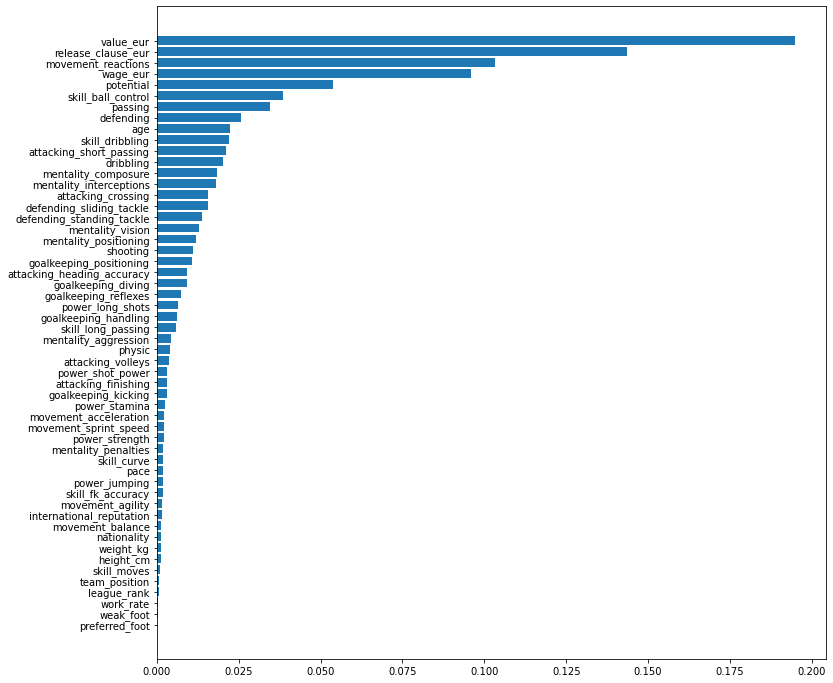

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
features = x_train.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize = (12,12))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [ ]:
f_i

[('preferred_foot', 0.00017296968889424582),
 ('weak_foot', 0.00039334212027116366),
 ('work_rate', 0.0005091410710794572),
 ('league_rank', 0.0005259511863596184),
 ('team_position', 0.0007891034355502419),
 ('skill_moves', 0.000880473417893877),
 ('height_cm', 0.0011991631456913445),
 ('weight_kg', 0.0012574563433947242),
 ('nationality', 0.0013094380908679575),
 ('movement_balance', 0.0013265900432828858),
 ('international_reputation', 0.0014744246677511088),
 ('movement_agility', 0.001559132082046122),
 ('skill_fk_accuracy', 0.0017630998069397064),
 ('power_jumping', 0.001839963461428605),
 ('pace', 0.0019087641087166707),
 ('skill_curve', 0.0019155562138184947),
 ('mentality_penalties', 0.001970198293614054),
 ('power_strength', 0.0020695737938811686),
 ('movement_sprint_speed', 0.002280643122422973),
 ('movement_acceleration', 0.0023157033782013315),
 ('power_stamina', 0.002540863896660877),
 ('goalkeeping_kicking', 0.0030903042517534166),
 ('attacking_finishing', 0.0031573476844

In [ ]:
print(len(f_i))
f_i30 = f_i[:]
f_i30 = dict(f_i30)
print()
print(f_i30)
print()
print(len(f_i30))

54

{'preferred_foot': 0.00017296968889424582, 'weak_foot': 0.00039334212027116366, 'work_rate': 0.0005091410710794572, 'league_rank': 0.0005259511863596184, 'team_position': 0.0007891034355502419, 'skill_moves': 0.000880473417893877, 'height_cm': 0.0011991631456913445, 'weight_kg': 0.0012574563433947242, 'nationality': 0.0013094380908679575, 'movement_balance': 0.0013265900432828858, 'international_reputation': 0.0014744246677511088, 'movement_agility': 0.001559132082046122, 'skill_fk_accuracy': 0.0017630998069397064, 'power_jumping': 0.001839963461428605, 'pace': 0.0019087641087166707, 'skill_curve': 0.0019155562138184947, 'mentality_penalties': 0.001970198293614054, 'power_strength': 0.0020695737938811686, 'movement_sprint_speed': 0.002280643122422973, 'movement_acceleration': 0.0023157033782013315, 'power_stamina': 0.002540863896660877, 'goalkeeping_kicking': 0.0030903042517534166, 'attacking_finishing': 0.003157347684452974, 'power_shot_power': 0.0032177521159645053, 'attacking_vo

In [ ]:
# Top features
f_i30fs = f_i30.keys()
f_i30fs = list(f_i30fs)
print(f_i30fs)

['preferred_foot', 'weak_foot', 'work_rate', 'league_rank', 'team_position', 'skill_moves', 'height_cm', 'weight_kg', 'nationality', 'movement_balance', 'international_reputation', 'movement_agility', 'skill_fk_accuracy', 'power_jumping', 'pace', 'skill_curve', 'mentality_penalties', 'power_strength', 'movement_sprint_speed', 'movement_acceleration', 'power_stamina', 'goalkeeping_kicking', 'attacking_finishing', 'power_shot_power', 'attacking_volleys', 'physic', 'mentality_aggression', 'skill_long_passing', 'goalkeeping_handling', 'power_long_shots', 'goalkeeping_reflexes', 'goalkeeping_diving', 'attacking_heading_accuracy', 'goalkeeping_positioning', 'shooting', 'mentality_positioning', 'mentality_vision', 'defending_standing_tackle', 'defending_sliding_tackle', 'attacking_crossing', 'mentality_interceptions', 'mentality_composure', 'dribbling', 'attacking_short_passing', 'skill_dribbling', 'age', 'defending', 'passing', 'skill_ball_control', 'potential', 'wage_eur', 'movement_reactio

In [ ]:
xf = x[f_i30fs]
from sklearn.preprocessing import StandardScaler
scalerb = StandardScaler()
xf_scaled = scalerb.fit_transform(xf)
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/scalerb.pickle', 'wb') as handle:
    pickle.dump(scalerb, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/scalerb.pickle', 'rb') as handle:
    scalerb = pickle.load(handle)

In [ ]:
x_trainf , x_testf , y_trainf , y_testf = train_test_split(xf_scaled , y , test_size = 0.2 , random_state = 0)
print(x_trainf.shape)
print(x_testf.shape)
print(y_trainf.shape)
print(y_testf.shape)

(15155, 54)
(3789, 54)
(15155,)
(3789,)


## Model Building and Training

In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(128, input_shape = (None , 54),activation = 'relu', name= 'Hidden_layer1'))
  model.add(tf.keras.layers.Dense(90, activation = 'relu',name = 'Hidden_layer2'))
  model.add(tf.keras.layers.Dense(56, activation = 'relu',name= 'Hidden_layer3'))
  model.add(tf.keras.layers.Dense(2, activation = 'softmax',name= 'Output_layer'))
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = 'accuracy')
  return model

modelb = create_model()
modelb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 128)         7040      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 90)          11610     
                                                                 
 Hidden_layer3 (Dense)       (None, None, 56)          5096      
                                                                 
 Output_layer (Dense)        (None, None, 2)           114       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


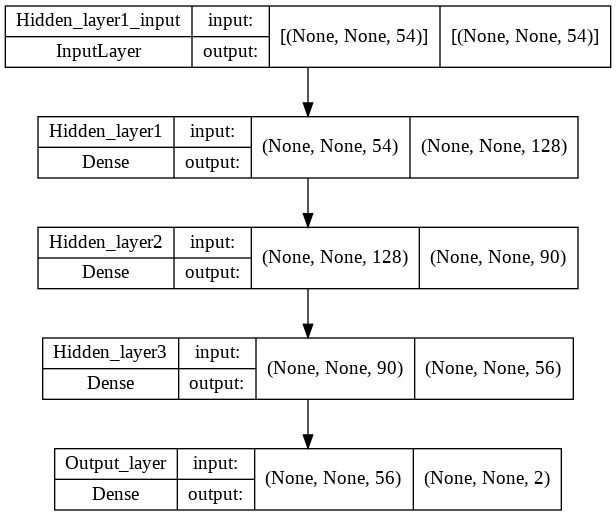

In [ ]:
# Plotting model architecture
tf.keras.utils.plot_model(modelb, to_file= '/content/drive/MyDrive/Sanju_Maam(Paid)/BST/bstmodel1.png', show_shapes=True)

In [ ]:
checkpointerb = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/MyDrive/Sanju_Maam(Paid)/BST/bst1.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

In [ ]:
int_epoch = 5
batch = 64
callbacks = [ checkpointerb]
history = modelb.fit(x_trainf,y_trainf,
                    epochs = int_epoch,
                     batch_size = batch,
                    validation_data = (x_testf, y_testf),
                    callbacks = callbacks)

Epoch 1/5
233/237 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9455WARNING:tensorflow:Model was constructed with shape (None, None, 54) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 54), dtype=tf.float32, name='Hidden_layer1_input'), name='Hidden_layer1_input', description="created by layer 'Hidden_layer1_input'"), but it was called on an input with incompatible shape (None, 54).

Epoch 1: val_accuracy improved from -inf to 0.97519, saving model to /content/drive/MyDrive/Sanju_Maam(Paid)/BST/bst1.hdf5
237/237 [==============================] - 2s 5ms/step - loss: 0.1310 - accuracy: 0.9460 - val_loss: 0.0604 - val_accuracy: 0.9752
Epoch 2/5
234/237 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9785
Epoch 2: val_accuracy did not improve from 0.97519
237/237 [==============================] - 1s 3ms/step - loss: 0.0543 - accuracy: 0.9785 - val_loss: 0.0681 - val_accuracy: 0.9696
Epoch 3/5
220/237 [=======================

In [ ]:
print(f"Loss: {history.history['loss'][-1]}")  
print(f"accuracy: {history.history['accuracy'][-1]}")   
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

Loss: 0.02318345569074154
accuracy: 0.9912239909172058
Validation accuracy: 0.9831089973449707


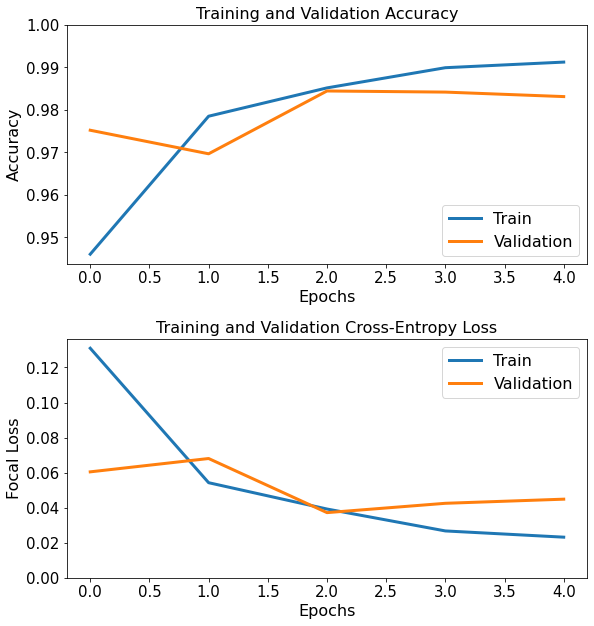

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 


plt.figure(figsize=(9, 9)) 
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3.0)
plt.plot(acc, label='Train' , linewidth = 3)
plt.plot(val_acc, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/acc_plot1.jpg')

plt.subplot(2, 1, 2)
plt.tight_layout(pad=3.0)
plt.plot(loss, label='Train', linewidth = 3)
plt.plot(val_loss, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Focal Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-Entropy Loss', fontsize=16)
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/loss_plot1.jpg')
plt.show()

In [ ]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

new_modelb = load_trained_model('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/bst1.hdf5')
new_modelb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 128)         7040      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 90)          11610     
                                                                 
 Hidden_layer3 (Dense)       (None, None, 56)          5096      
                                                                 
 Output_layer (Dense)        (None, None, 2)           114       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predb = new_modelb.predict(x_testf)
y_predargmaxb = tf.math.argmax(y_predb, axis = 1)
from sklearn.metrics import classification_report
crb = classification_report(y_testf, y_predargmaxb, digits = 4)
print(crb)

              precision    recall  f1-score   support

           0     0.9858    0.9927    0.9892      2724
           1     0.9809    0.9634    0.9721      1065

    accuracy                         0.9844      3789
   macro avg     0.9833    0.9780    0.9806      3789
weighted avg     0.9844    0.9844    0.9844      3789



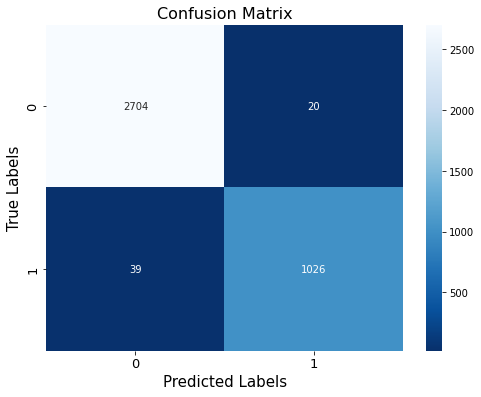

In [ ]:
classes = [0,1]
plt.figure(figsize = (8,6))
from sklearn.metrics import confusion_matrix
cmb = confusion_matrix(y_testf, y_predargmaxb)
ax = sns.heatmap(cmb,annot =True , fmt='g',cmap='Blues_r') 
plt.title('Confusion Matrix',fontsize = 16)
plt.ylabel('True Labels',fontsize = 15)
plt.xlabel('Predicted Labels', fontsize = 15)
plt.yticks(verticalalignment = 'center')
plt.xticks(fontsize = 13); plt.yticks(fontsize = 13)
ax.xaxis.set_ticklabels(classes,fontsize = 13); ax.yaxis.set_ticklabels(classes,fontsize = 13)
plt.savefig('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/cm1.jpg')
plt.show()

## Prediction function for building a soccer team using deep learning

In [ ]:
# Categorical Columns: 'nationality', 'preferred_foot', 'work_rate', 'team_position'
"""
'preferred_foot', 'league_rank', 'weak_foot', 'work_rate', 'skill_moves', 'team_position', 'height_cm',
'nationality', 'weight_kg', 'movement_agility', 'international_reputation', 'movement_balance', 'skill_fk_accuracy', 
'power_jumping', 'movement_acceleration', 'mentality_penalties', 'skill_long_passing', 'power_strength', 'pace', 
'power_long_shots', 'movement_sprint_speed', 'skill_curve', 'power_stamina', 'attacking_volleys', 'goalkeeping_kicking', 
'attacking_finishing', 'physic', 'mentality_aggression', 'attacking_heading_accuracy', 'mentality_vision', 'goalkeeping_handling', 
'goalkeeping_reflexes', 'power_shot_power', 'skill_dribbling', 'goalkeeping_diving', 'shooting', 'goalkeeping_positioning', 
'defending_standing_tackle', 'attacking_crossing', 'mentality_interceptions', 'dribbling', 'mentality_positioning', 'defending_sliding_tackle', 
'defending', 'age', 'attacking_short_passing', 'mentality_composure', 
'passing', 'potential', 'skill_ball_control', 'wage_eur', 'movement_reactions', 'release_clause_eur', 'value_eur'
"""

"\n'preferred_foot', 'league_rank', 'weak_foot', 'work_rate', 'skill_moves', 'team_position', 'height_cm',\n'nationality', 'weight_kg', 'movement_agility', 'international_reputation', 'movement_balance', 'skill_fk_accuracy', \n'power_jumping', 'movement_acceleration', 'mentality_penalties', 'skill_long_passing', 'power_strength', 'pace', \n'power_long_shots', 'movement_sprint_speed', 'skill_curve', 'power_stamina', 'attacking_volleys', 'goalkeeping_kicking', \n'attacking_finishing', 'physic', 'mentality_aggression', 'attacking_heading_accuracy', 'mentality_vision', 'goalkeeping_handling', \n'goalkeeping_reflexes', 'power_shot_power', 'skill_dribbling', 'goalkeeping_diving', 'shooting', 'goalkeeping_positioning', \n'defending_standing_tackle', 'attacking_crossing', 'mentality_interceptions', 'dribbling', 'mentality_positioning', 'defending_sliding_tackle', \n'defending', 'age', 'attacking_short_passing', 'mentality_composure', \n'passing', 'potential', 'skill_ball_control', 'wage_eur', 

In [ ]:
# Loading label encoders
import pickle
# le1b is for nationality column
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le1b.pickle', 'rb') as handle:
    le1b = pickle.load(handle)
# le2b is for preferred_foot column
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le2b.pickle', 'rb') as handle:
    le2b = pickle.load(handle)
# le3b is for work_rate column
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le3b.pickle', 'rb') as handle:
    le3b = pickle.load(handle)
# le4b is for team_position column
with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/le4b.pickle', 'rb') as handle:
    le4b = pickle.load(handle)

with open('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/scalerb.pickle', 'rb') as handle:
    scalerb = pickle.load(handle)

In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(128, input_shape = (None , 54),activation = 'relu', name= 'Hidden_layer1'))
  model.add(tf.keras.layers.Dense(90, activation = 'relu',name = 'Hidden_layer2'))
  model.add(tf.keras.layers.Dense(56, activation = 'relu',name= 'Hidden_layer3'))
  model.add(tf.keras.layers.Dense(2, activation = 'softmax',name= 'Output_layer'))
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = 'accuracy')
  return model

modelb = create_model()
modelb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 128)         7040      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 90)          11610     
                                                                 
 Hidden_layer3 (Dense)       (None, None, 56)          5096      
                                                                 
 Output_layer (Dense)        (None, None, 2)           114       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

new_modelb = load_trained_model('/content/drive/MyDrive/Sanju_Maam(Paid)/BST/bst1.hdf5')
new_modelb.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, None, 128)         7040      
                                                                 
 Hidden_layer2 (Dense)       (None, None, 90)          11610     
                                                                 
 Hidden_layer3 (Dense)       (None, None, 56)          5096      
                                                                 
 Output_layer (Dense)        (None, None, 2)           114       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def bst(age, height_cm, weight_kg, nationality, league_rank,
       potential, value_eur, wage_eur, preferred_foot,
       international_reputation, weak_foot, skill_moves, work_rate,
       release_clause_eur, team_position, pace, shooting, passing,
       dribbling, defending, physic, attacking_crossing,
       attacking_finishing, attacking_heading_accuracy,
       attacking_short_passing, attacking_volleys, skill_dribbling,
       skill_curve, skill_fk_accuracy, skill_long_passing,
       skill_ball_control, movement_acceleration,movement_sprint_speed,
       movement_agility, movement_reactions, movement_balance,
       power_shot_power, power_jumping, power_stamina, power_strength,
       power_long_shots, mentality_aggression, mentality_interceptions,
       mentality_positioning, mentality_vision, mentality_penalties,
       mentality_composure, defending_standing_tackle,
       defending_sliding_tackle, goalkeeping_diving,
       goalkeeping_handling, goalkeeping_kicking,
       goalkeeping_positioning, goalkeeping_reflexes):
  
  nation = le1b.transform([nationality])
  pf = le2b.transform([preferred_foot])
  wr = le3b.transform([work_rate])
  tp = le4b.transform([team_position])
  x = np.array([age, height_cm, weight_kg, nation, league_rank,
       potential, value_eur, wage_eur, pf,
       international_reputation, weak_foot, skill_moves, wr,
       release_clause_eur, tp, pace, shooting, passing,
       dribbling, defending, physic, attacking_crossing,
       attacking_finishing, attacking_heading_accuracy,
       attacking_short_passing, attacking_volleys, skill_dribbling,
       skill_curve, skill_fk_accuracy, skill_long_passing,
       skill_ball_control, movement_acceleration,movement_sprint_speed,
       movement_agility, movement_reactions, movement_balance,
       power_shot_power, power_jumping, power_stamina, power_strength,
       power_long_shots, mentality_aggression, mentality_interceptions,
       mentality_positioning, mentality_vision, mentality_penalties,
       mentality_composure, defending_standing_tackle,
       defending_sliding_tackle, goalkeeping_diving,
       goalkeeping_handling, goalkeeping_kicking,
       goalkeeping_positioning, goalkeeping_reflexes])
  x_scaledb = scalerb.transform([x])
  predictionb = new_modelb.predict(x_scaledb.reshape(1, -1))
  predictionmaxb = tf.math.argmax(predictionb, axis=1)
  opb = np.array(predictionmaxb).tolist()
  opbs = ['Selected' if i==1 else 'Not Selected' for i in opb]
  return opbs

result = bst(33,170,72,'Mexico',3.0,
             93,67500,5600,'Left',
             50,4,4,'Medium/Low',
             138400000.0,'CAM',85.0,92.0,91.0,
             95.0,38.0,65.0,85,
             95,70,
             91,88,96,
             93,94,91,
             96,91,78,
             91,94,95,
             86,68,72,69,
             94,23,32,
             93,30,75,
             96,35,
             24,6,
             11,15,
             14,9)

print(result)

['Not Selected']


## Frontend for building a soccer team using deep learning

In [ ]:
! pip install gradio

     |████████████████████████████████| 871 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 63.2 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 47.7 MB/s 
     |████████████████████████████████| 210 kB 59.9 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 144 kB 65.6 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 271 kB 70.7 MB/s 
     |████████████████████████████████| 10.9 MB 50.9 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
     |████████████████████████████████| 79 kB 9.6 MB/s 
     |████████████████████████████████| 3.6 MB 56.3 MB/s 
     |████████████████████████████████| 61 kB 444 kB/s 
     |████████████████████████████████| 856 kB 65.1 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=3a2b

In [ ]:
import gradio as gr

In [ ]:
outputs = gr.outputs.Textbox()
# Categorical Columns: 'nationality', 'preferred_foot', 'work_rate', 'team_position'
# Treating the overall column as target variable
# greater than or equal to 70 and less than 70 as potential club member or not
# I have choosen 70 as threshold as most of the major clubs have only players whose rating is greater than 70
# 1 is will the player be a club member
# 0 is player not be a club member
appb = gr.Interface(fn=bst, inputs=['number','number','number','text','number',
                                  'number','number','number','text',
                                   'number','number','number','text',
                                   'number','text','number','number','number',
                                   'number','number','number','number',
                                   'number','number',
                                   'number','number','number',
                                   'number','number','number',
                                   'number','number','number',
                                   'number','number','number',
                                   'number','number','number','number',
                                   'number','number','number',
                                   'number','number','number',
                                   'number','number',
                                   'number','number',
                                   'number','number',
                                   'number','number',
                                   ],
                   outputs=outputs,
                    description=
                   """
                   Building a soccer team using deep learning
                   """)

appb.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://51909.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f0b53483850>,
 'http://127.0.0.1:7861/',
 'https://51909.gradio.app')